In [67]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt


In [68]:
data= pd.read_csv('train.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [69]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [70]:
# fill the missing value
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True) 
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median(), inplace=True) 
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)


C:\Users\nasee\AppData\Local\Temp\ipykernel_18028\4006248077.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)
C:\Users\nasee\AppData\Local\Temp\ipykernel_18028\4006248077.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [72]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [73]:
# Check for duplicate rows
duplicates = data.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")


Number of duplicate rows: 0


In [74]:

categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

print(data_encoded.head())


    Loan_ID  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0  LP001002             5849                0.0       128.0             360.0   
1  LP001003             4583             1508.0       128.0             360.0   
2  LP001005             3000                0.0        66.0             360.0   
3  LP001006             2583             2358.0       120.0             360.0   
4  LP001008             6000                0.0       141.0             360.0   

   Credit_History Loan_Status  Gender_Male  Married_Yes  Dependents_1  \
0             1.0           Y         True        False         False   
1             1.0           N         True         True          True   
2             1.0           Y         True         True         False   
3             1.0           Y         True         True         False   
4             1.0           Y         True        False         False   

   Dependents_2  Dependents_3+  Education_Not Graduate  Self_Employed_Yes 

In [75]:
#  remove a column which is not usefull
data_encoded = data_encoded.drop(['Loan_ID'], axis=1)
print(data_encoded.columns)

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Gender_Male',
       'Married_Yes', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')


In [76]:
# change the loan status value to 1 and 0 from yes and no
data_encoded['Loan_Status'] = data_encoded['Loan_Status'].map({'Y': 1, 'N': 0})
print(data_encoded['Loan_Status'].value_counts())

Loan_Status
1    422
0    192
Name: count, dtype: int64


In [77]:
X = data_encoded.drop(['Loan_Status'], axis=1)
y = data_encoded['Loan_Status'] 

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)

Training features shape: (491, 14)
Testing features shape: (123, 14)


In [79]:
final_model = RandomForestClassifier(random_state=42)
final_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [80]:
y_pred_final = final_model.predict(X_test)

In [81]:
accuracy = accuracy_score(y_test, y_pred_final)
print("Final Model Accuracy:", accuracy)

print("Classification Report:\n", classification_report(y_test, y_pred_final))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_final))

Final Model Accuracy: 0.7804878048780488
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123

Confusion Matrix:
 [[18 25]
 [ 2 78]]


Feature ranking:
1. Feature Credit_History: 0.2378
2. Feature ApplicantIncome: 0.2079
3. Feature LoanAmount: 0.1862
4. Feature CoapplicantIncome: 0.1155
5. Feature Loan_Amount_Term: 0.0562
6. Feature Property_Area_Semiurban: 0.0299
7. Feature Married_Yes: 0.0286
8. Feature Property_Area_Urban: 0.0255
9. Feature Gender_Male: 0.0223
10. Feature Dependents_1: 0.0216
11. Feature Education_Not Graduate: 0.0211
12. Feature Self_Employed_Yes: 0.0183
13. Feature Dependents_2: 0.0168
14. Feature Dependents_3+: 0.0124


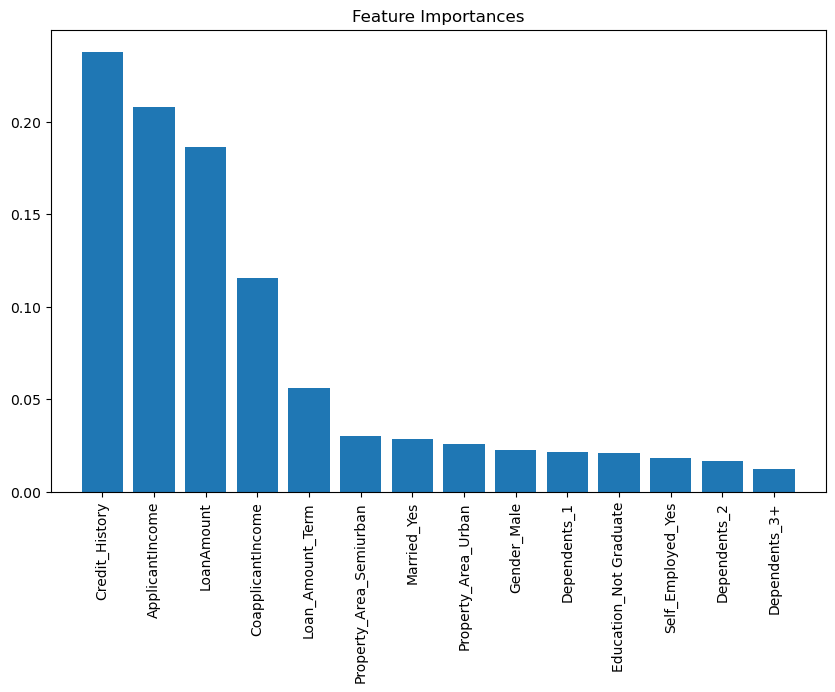

In [82]:
importances = final_model.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. Feature {X.columns[indices[f]]}: {importances[indices[f]]:.4f}")

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()
